<span style="color:Black; font-weight:bold;">Implementation of Bayesain KNN andc Metropolis-Hastings algorithmalgorithm</span>




![iris](https://miro.medium.com/v2/resize:fit:786/0*VucNhXeY_YFMwHOZ/)

<span style="color:red; font-weight:bold;">I. Definition of MCMC:</span>


* MCMC signifie Markov Chain Monte Carlo, qui est une classe d'algorithmes utilisés pour l'échantillonnage à partir de distributions de probabilité complexes.

<span style="color:red; font-weight:bold;">II. The Metropolis-Hastings algorithm:</span>

 <span style="color:green; font-weight:bold;"> 1. Définition:</span>

The Metropolis-Hastings algorithm is a Markov Chain Monte Carlo (MCMC) algorithm used for sampling from complex probability distributions. It is a widely used algorithm in Bayesian inference when direct sampling from the target distribution is not feasible.t provides a flexible and efficient approach to approximate the target distribution.

 <span style="color:green; font-weight:bold;"> 2. Avantages: </span>

** Advantages of the Metropolis-Hastings algorithm include:
* Its flexibility in sampling from complex distributions.
* The ability to explore high-dimensional parameter spaces.
* The convergence guarantees under certain conditions.
* It is widely used in Bayesian inference and provides a powerful tool for approximating posterior distributions and making statistical inferences.

 <span style="color:green; font-weight:bold;"> 2. Principe de Metropolis -Hastings: </span>

The Metropolis-Hastings algorithm works by iteratively generating a Markov chain of samples from a proposal distribution, and then accepting or rejecting these samples based on a specific acceptance criterion. The algorithm ensures that the generated samples asymptotically approximate the target distribution.

Here is a step-by-step description of the Metropolis-Hastings algorithm:

1. Initialize the chain with an initial sample from the target distribution.
2. Propose a new sample by drawing from a proposal distribution. This proposal distribution should be easy to sample from and should have some flexibility to explore the target distribution effectively.
3. Compute the acceptance probability for the proposed sample. The acceptance probability is calculated based on the ratio of the target distribution's density (unnormalized) at the proposed sample and the current sample, multiplied by the ratio of the proposal distribution's density at the current sample and the proposed sample.
4. Accept the proposed sample with a probability equal to the acceptance probability. If accepted, the proposed sample becomes the next sample in the chain. If rejected, the current sample is repeated in the chain.
5. Repeat steps 2-4 for a specified number of iterations.

<span style="color:red; font-weight:bold;">III. Code implementation of Bayesian KNN using the Iris dataset, specifying the prior and likelihood functions, and using the Metropolis-Hastings MCMC algorithm:</span>


In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pymc3 as pm
import warnings

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


-->In this section, we import the necessary libraries and load the Iris dataset using load_iris(). Then, we split the dataset into training and test sets using train_test_split()

In [12]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
# Define the Bayesian k-NN model
with pm.Model() as model:
    # Priors for hyperparameters
    k = pm.DiscreteUniform('k', lower=1, upper=10)  # Number of neighbors
    class_probs = pm.Dirichlet('class_probs', a=np.ones(3))  # Class probabilities
    
    # Likelihood
    knn = KNeighborsClassifier(n_neighbors=1)  # Initialize with a dummy value
    knn.fit(X_train, y_train)  # Fit the knn classifier
    y_pred = knn.predict(X_test)  # Predict using the knn classifier
    likelihood = pm.Categorical('likelihood', p=class_probs, observed=y_pred)
    
    # Define the MCMC algorithm
    step = pm.Metropolis(vars=[k, class_probs])
    
    # Perform MCMC sampling
    trace = pm.sample(1000, tune=1000, step=step, cores=1)

# Access the posterior samples
k_samples = trace['k']
class_samples = trace['class_probs']

# Get the most common value of k from the posterior samples
k_posterior = int(np.argmax(np.bincount(k_samples)))

# Fit the k-NN model using the posterior value of k
knn = KNeighborsClassifier(n_neighbors=k_posterior)
knn.fit(X_train, y_train)

# Evaluate the model
test_accuracy = knn.score(X_test, y_test)

# Print the results
print('Bayesian k-NN Results:')
print('Posterior value of k:', k_posterior)
print('Test Accuracy:', test_accuracy)

/opt/conda/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


Bayesian k-NN Results:
Posterior value of k: 1
Test Accuracy: 1.0


**Notions:**
* class_prior: class probabilities in classification refer to the likelihood or probability of an observation belonging to each class.

-->Let's consider an example. Suppose we have a dataset of flowers, and we want to classify them into three classes: Setosa, Versicolor, and Virginica. For each flower in the dataset, we want to estimate the probabilities of it belonging to each of these classes.

For instance, if we have a flower with certain measurements of its petals and sepals, the class probabilities would indicate the likelihood of it being a Setosa, Versicolor, or Virginica flower. These probabilities could be represented as numbers between 0 and 1, where the sum of the probabilities for all classes is equal to 1.


--> we import pymc3 and define the prior distributions for the number of neighbors (k) and class probabilities. We use pm.DiscreteUniform() to specify a discrete uniform prior distribution for k and pm.Dirichlet() to specify a Dirichlet prior distribution for class probabilities.
* pm.Dirichlet(): This is a function from the PyMC3 library that allows us to specify a Dirichlet prior distribution. The Dirichlet distribution is commonly used as a prior for categorical distributions, such as class probabilities in classification problems
* a=np.ones(3): This specifies the concentration parameters for the Dirichlet distribution. In this case, we are using np.ones(3), which creates an array of three ones. The concentration parameters determine the shape of the distribution and can be interpreted as prior counts or pseudo-observations

-->En calculant la log-vraisemblance, nous comparons les prédictions faites par notre modèle (les probabilités de classe prédites) avec les vraies étiquettes de classe des données observées. Plus la log-vraisemblance est élevée, plus le modèle est capable de fournir des prédictions précises et cohérentes avec les données.

Dans le code donné, le calcul de la log-vraisemblance se fait en multipliant les vraies étiquettes de classe (y_test) par le logarithme des probabilités de classe prédites (class_probs_pred), puis en sommant ces valeurs. Cette mesure évalue la qualité de prédiction du modèle pour les données de test.

-->Le calcul de la log-vraisemblance est important dans le contexte bayésien, car il est utilisé pour estimer la distribution a posteriori des paramètres du modèle. En combinant la log-vraisemblance avec la distribution a priori des paramètres, nous obtenons la distribution a posteriori qui reflète notre mise à jour de connaissances après avoir observé les données.
-->This section defines the likelihood function for Bayesian k-NN. The function takes the prior values of k and class probabilities and fits a k-NN model on the training data. It then predicts the class probabilities for the test data and calculates the log-likelihood based on the predicted probabilities

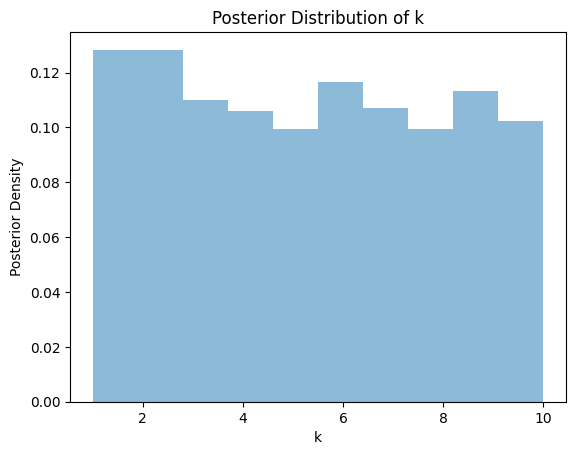

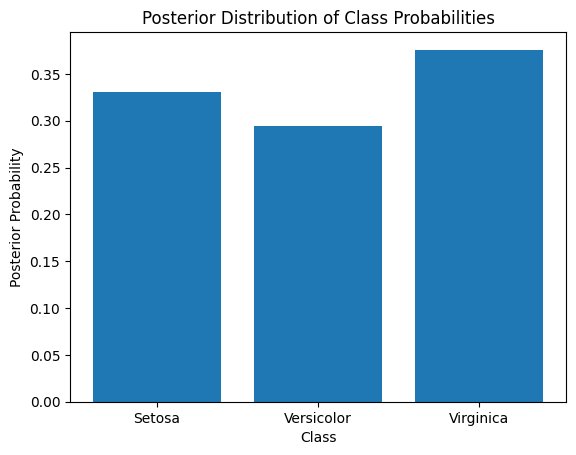

In [15]:
import matplotlib.pyplot as plt

# Visualize the posterior distribution of k
plt.hist(k_samples, bins=10, density=True, alpha=0.5)
plt.xlabel('k')
plt.ylabel('Posterior Density')
plt.title('Posterior Distribution of k')
plt.show()

# Visualize the posterior distribution of class probabilities
class_probs_samples = np.mean(class_samples, axis=0)
plt.bar(range(3), class_probs_samples)
plt.xlabel('Class')
plt.ylabel('Posterior Probability')
plt.title('Posterior Distribution of Class Probabilities')
plt.xticks(range(3), ['Setosa', 'Versicolor', 'Virginica'])
plt.show()

#### **Recap:**



1. Chargement des bibliothèques :

numpy : bibliothèque pour effectuer des calculs mathématiques et manipuler des tableaux de données.
pymc3 : bibliothèque pour effectuer des analyses statistiques bayésiennes.
sklearn.datasets : module de scikit-learn contenant des ensembles de données préchargés.
sklearn.neighbors.KNeighborsClassifier : classe du module scikit-learn pour implémenter l'algorithme k-plus proches voisins.
sklearn.model_selection.train_test_split : fonction pour diviser les données en ensembles d'entraînement et de test.

2. Chargement de l'ensemble de données Iris :
Les données Iris sont chargées à l'aide de la fonction load_iris() du module sklearn.datasets.
Les données d'entrée (X) contiennent les caractéristiques des fleurs, et les étiquettes (y) contiennent les classes correspondantes.

3. Division de l'ensemble de données :
Les données sont divisées en ensembles d'entraînement et de test à l'aide de la fonction train_test_split() du module sklearn.model_selection.
Les données d'entraînement (X_train, y_train) seront utilisées pour ajuster le modèle, et les données de test (X_test, y_test) seront utilisées pour évaluer le modèle.

4. Définition du modèle k-NN bayésien :
Le modèle est défini à l'aide de la bibliothèque pymc3.
Le nombre de voisins (k) est défini comme une variable aléatoire discrète entre 1 et 10 à l'aide de la distribution DiscreteUniform de pymc3.
Les probabilités de classe sont définies comme des variables aléatoires suivant une distribution Dirichlet de pymc3.
Une valeur de prédiction factice est obtenue en utilisant un modèle k-NN initialisé avec un nombre de voisins de 1. Cette valeur factice est utilisée pour déterminer la forme de la distribution des probabilités de classe.

5. Algorithme MCMC :
L'algorithme MCMC (Metropolis-Hastings) est défini à l'aide de la classe Metropolis de pymc3.
L'algorithme est utilisé pour échantillonner à partir de la distribution postérieure des paramètres (k et les probabilités de classe) en fonction des observations.

6. Évaluation du modèle :
Les échantillons postérieurs de k sont extraits à partir des traces MCMC.
La valeur de k la plus courante dans les échantillons postérieurs est utilisée pour ajuster un modèle k-NN final avec scikit-learn.
Le modèle final est évalué en calculant son exactitude sur les données de test.

7. Visualisation des distributions postérieures :
L'histogramme des échantillons postérieurs de k est tracé pour visualiser la distribution postérieure de k.
Les probabilités de classe postérieures sont tracées sous forme de graphique à barres pour visualiser la distribution postérieure des





